In [135]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [136]:
# Specify filepaths and filenames.
filepath = '/home/jovyan/ML_MB_Norway_data/'
filename = '2023-06-01_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_des', 'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun',
       'tp_jul', 'tp_aug', 'tp_sep'],
      dtype='object', length=204)

In [137]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

In [138]:
# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

glacier_data_all
# 950 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,year
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1991
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1998
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,2000
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,2001
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,RGI60-08.01126,G007099E61715N,2297,32,401670.0,6847020.0,1800.0,NaN,N99,N9968,...,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336,1970
2876,RGI60-08.01126,G007099E61715N,2297,32,400520.0,6842250.0,1555.0,NaN,NaN,NA63,...,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1963
2877,RGI60-08.01126,G007099E61715N,2297,32,400350.0,6842570.0,1579.0,NaN,NC,NC63,...,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1963
2878,RGI60-08.01126,G007099E61715N,2297,32,400260.0,6840930.0,1612.0,NaN,NF,NF62,...,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234,1962


In [139]:
# Select columns

base_cols = ['balance_netto','year','lat','lon','altitude','aspect','slope','slope_factor']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]
cols

['balance_netto',
 'year',
 'lat',
 'lon',
 'altitude',
 'aspect',
 'slope',
 'slope_factor',
 't2m_oct',
 't2m_nov',
 't2m_des',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'tp_oct',
 'tp_nov',
 'tp_des',
 'tp_jan',
 'tp_feb',
 'tp_mar',
 'tp_apr',
 'tp_may',
 'tp_jun',
 'tp_jul',
 'tp_aug',
 'tp_sep']

In [140]:
# Select columns for Nigardsbreen
glacier_data = glacier_data_all[cols]

# Reset index of new dataframe
glacier_data.reset_index(drop=True, inplace=True)

glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,270.932251,265.721527,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,268.193298,264.783997,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,269.597687,269.089081,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,273.114014,265.902954,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,272.787598,265.874878,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
946,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
947,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
948,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [141]:
# Select time period
start_yr = 1962
end_yr = 1981

glacier_data = glacier_data[(glacier_data['year']>=start_yr) & (glacier_data['year']<=1981)]

#glacier_data.groupby('year').count()



In [142]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-3.59,1962,61.692518,7.165575,925.0,2.273733,0.175035,2.845278,272.650177,266.070740,...,0.003817,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100
1,1.23,1967,61.712049,7.209064,1591.0,4.563647,0.047101,3.872423,269.919556,263.104767,...,0.005514,0.003147,0.005647,0.012879,0.003883,0.003790,0.005089,0.005791,0.004455,0.002829
2,-0.56,1970,61.712785,7.207659,1580.0,3.384696,0.046929,3.872423,271.922943,261.887878,...,0.002857,0.001409,0.001630,0.003193,0.002061,0.002845,0.003021,0.007638,0.003628,0.005945
3,-1.53,1969,61.712955,7.208992,1580.0,3.384696,0.046929,3.872423,268.545532,261.819550,...,0.001483,0.005365,0.002054,0.003026,0.003460,0.001860,0.001995,0.006970,0.002270,0.009657
4,0.70,1971,61.712682,7.208724,1577.0,3.384696,0.046929,3.872423,269.713837,262.803406,...,0.005583,0.006180,0.006162,0.004273,0.004249,0.004014,0.003087,0.003699,0.004485,0.005794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
532,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
533,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
534,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [143]:
# Remove cells with nan in balance_netto.
#glacier_data['balance_netto'].notna()
glacier_data = glacier_data[glacier_data['balance_netto'].notna()]


In [144]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-3.59,1962,61.692518,7.165575,925.0,2.273733,0.175035,2.845278,272.650177,266.070740,...,0.003817,0.008573,0.008103,0.001171,0.001844,0.001825,0.004144,0.001378,0.005737,0.005100
1,1.23,1967,61.712049,7.209064,1591.0,4.563647,0.047101,3.872423,269.919556,263.104767,...,0.005514,0.003147,0.005647,0.012879,0.003883,0.003790,0.005089,0.005791,0.004455,0.002829
2,-0.56,1970,61.712785,7.207659,1580.0,3.384696,0.046929,3.872423,271.922943,261.887878,...,0.002857,0.001409,0.001630,0.003193,0.002061,0.002845,0.003021,0.007638,0.003628,0.005945
3,-1.53,1969,61.712955,7.208992,1580.0,3.384696,0.046929,3.872423,268.545532,261.819550,...,0.001483,0.005365,0.002054,0.003026,0.003460,0.001860,0.001995,0.006970,0.002270,0.009657
4,0.70,1971,61.712682,7.208724,1577.0,3.384696,0.046929,3.872423,269.713837,262.803406,...,0.005583,0.006180,0.006162,0.004273,0.004249,0.004014,0.003087,0.003699,0.004485,0.005794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
500,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
501,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
502,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [145]:
glacier_data.groupby('year').count()


,balance_netto,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,t2m_des,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
year,,,,,,,,,,,,,,,,,,,,,
1962,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
1963,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
1964,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
1965,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
1966,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
1967,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1968,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
1969,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
1970,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


**Train and test split**

We have 504 observations over the 20-year period 1962-1981, with between 15 and 41 observations for each year. 

We do a random split in time by the index of the measurement (0-503). 

In [146]:
#glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, 
                                               train_size=0.7,
                                               test_size=0.3)

df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]
df_train_all.shape, df_test.shape

((352, 32), (152, 32))

In [148]:
df_train_all.reset_index(drop=True, inplace=True)
df_train_all

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,1.10,1968,61.681902,7.092472,1719.0,1.200749,0.049368,3.872423,269.369202,268.200867,...,0.009222,0.007661,0.003095,0.009523,0.002494,0.002718,0.004108,0.000913,0.001510,0.004622
1,-0.59,1974,61.673418,7.160832,1528.0,1.843503,0.094491,3.872423,267.981476,262.598419,...,0.010480,0.006196,0.004864,0.000416,0.001339,0.001682,0.002594,0.005909,0.006567,0.007737
2,0.50,1979,61.681593,7.109691,1683.0,1.781077,0.052969,3.872423,271.196442,266.543671,...,0.001029,0.002923,0.003478,0.007286,0.002049,0.005014,0.002891,0.004788,0.006794,0.011293
3,0.81,1975,61.724390,7.086344,1723.0,2.609882,0.025236,3.872423,267.426544,263.458527,...,0.013827,0.011317,0.002598,0.001941,0.003448,0.003203,0.003269,0.003300,0.002306,0.012354
4,1.59,1981,61.735605,7.118064,1689.0,3.709048,0.052258,3.872423,266.531525,262.128510,...,0.013758,0.008757,0.005283,0.003455,0.003221,0.001873,0.006580,0.006413,0.005014,0.005661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-0.86,1970,61.704901,7.124475,1556.0,2.105408,0.045844,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
348,1.57,1979,61.685277,7.085893,1742.0,1.723789,0.110127,3.757201,271.196442,266.543671,...,0.001029,0.002923,0.003478,0.007286,0.002049,0.005014,0.002891,0.004788,0.006794,0.011293
349,1.45,1981,61.745307,7.162775,1814.0,2.630348,0.037965,3.872423,267.259552,262.853485,...,0.012507,0.008299,0.004766,0.003121,0.003185,0.001601,0.005953,0.005712,0.004436,0.004660
350,2.30,1965,61.739237,7.166792,1776.0,3.373222,0.054198,3.872423,270.268005,265.798187,...,0.007511,0.004716,0.003660,0.004025,0.001737,0.000774,0.004213,0.002096,0.004161,0.005829


In [149]:
df_test.reset_index(drop=True, inplace=True)
df_test

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,1.96,1965,61.693279,7.073826,1798.0,0.994957,0.036639,3.872423,270.186035,265.783020,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
1,-0.55,1970,61.726333,7.161369,1589.0,3.466967,0.217772,2.495736,271.922943,261.887878,...,0.002857,0.001409,0.001630,0.003193,0.002061,0.002845,0.003021,0.007638,0.003628,0.005945
2,-1.78,1979,61.705080,7.126998,1556.0,1.899492,0.052038,3.872423,271.196442,266.543671,...,0.001029,0.002923,0.003478,0.007286,0.002049,0.005014,0.002891,0.004788,0.006794,0.011293
3,0.62,1963,61.684274,7.059265,1870.0,1.261072,0.068696,3.872423,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
4,-9.34,1970,61.679104,7.202204,416.0,3.087013,0.265076,2.218085,271.922943,261.887878,...,0.002857,0.001409,0.001630,0.003193,0.002061,0.002845,0.003021,0.007638,0.003628,0.005945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2.07,1967,61.687155,7.111903,1627.0,1.615099,0.098105,3.872423,269.845184,263.149567,...,0.005696,0.003222,0.005835,0.013168,0.004009,0.003922,0.005214,0.005991,0.004655,0.002957
148,0.39,1972,61.681815,7.097146,1703.0,2.215432,0.071877,3.872423,269.886169,263.983093,...,0.014363,0.001613,0.001088,0.003741,0.002744,0.001128,0.003996,0.002492,0.007346,0.004363
149,2.79,1976,61.687690,7.036893,1944.0,5.792658,0.076103,3.872423,271.261719,267.888855,...,0.020577,0.008093,0.006526,0.005787,0.006091,0.002615,0.004403,0.003775,0.002953,0.003828
150,-0.49,1968,61.717855,7.153927,1464.0,2.290579,0.028921,3.872423,269.478516,268.247192,...,0.008928,0.007455,0.002959,0.009316,0.002403,0.002675,0.003983,0.000904,0.001479,0.004552


Training set is 352 and test set is 152. 

In [150]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all.csv')

**Train and validation split**

Training dataset is 352 measurements in total. 

Split in 80% training and 20% validation.

In [151]:
idcs = df_train_all.index.values

train_dataset, validation_dataset = train_test_split(idcs, 
                                                   train_size=0.8,
                                                   test_size=0.2)

df_train = glacier_data.loc[train_dataset]
df_validation = glacier_data.loc[validation_dataset]
df_train.shape, df_validation.shape

((281, 32), (71, 32))

Training set is 281 and test set is 71.

In [154]:
df_validation.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [155]:
# Save training and validation dataset
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train.to_csv(filepath + 'train_test/data_train.csv')
df_validation.to_csv(filepath + 'train_test/data_validation.csv')


**Run from here**

In [156]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [159]:
# Load training and validation datasets
df_train = pd.read_csv(filepath + 'train_test/data_train.csv', index_col=0)
df_validation = pd.read_csv(filepath + 'train_test/data_validation.csv', index_col=0)
df_train.shape, df_validation.shape

((281, 32), (71, 32))

In [160]:
df_train

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,1.41,1975,61.685039,7.064490,1844.0,1.232326,0.077025,3.872423,267.426544,263.458527,...,0.013827,0.011317,0.002598,0.001941,0.003448,0.003203,0.003269,0.003300,0.002306,0.012354
1,2.25,1971,61.684690,7.067783,1833.0,1.349136,0.084869,3.872423,269.625793,263.006836,...,0.005796,0.006443,0.006475,0.004463,0.004315,0.004096,0.003130,0.003811,0.004685,0.006116
2,3.80,1962,61.689068,7.080894,1768.0,2.196958,0.066339,3.872423,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234
3,2.05,1978,61.679698,7.038743,1944.0,6.116267,0.045053,3.872423,272.620575,266.043396,...,0.005744,0.006021,0.001941,0.003749,0.002073,0.001141,0.004602,0.004218,0.006686,0.008225
4,0.81,1971,61.705095,7.129438,1542.0,1.648008,0.091687,3.872423,269.625793,263.006836,...,0.005796,0.006443,0.006475,0.004463,0.004315,0.004096,0.003130,0.003811,0.004685,0.006116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.53,1965,61.695574,7.129882,1462.0,2.116064,0.139774,3.256451,270.186035,265.783020,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
277,-0.07,1972,61.707805,7.111662,1597.0,1.450496,0.059921,3.872423,269.886169,263.983093,...,0.014363,0.001613,0.001088,0.003741,0.002744,0.001128,0.003996,0.002492,0.007346,0.004363
278,0.08,1966,61.722164,7.090286,1710.0,2.434247,0.064179,3.872423,272.962189,259.079071,...,0.002266,0.001983,0.001919,0.006016,0.001595,0.004077,0.002879,0.004971,0.003546,0.009720
279,1.70,1965,61.688237,7.103103,1654.0,2.327077,0.046845,3.872423,270.186035,265.783020,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844


In [189]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['balance_netto']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [179]:
X_validation.shape, y_validation.shape

((71, 28), (71, 1))

In [180]:
X_train.shape, y_train.shape

((281, 28), (281, 1))

In [181]:
def plot_prediction(y1, y2, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation", fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

**Linear regression**

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [183]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [184]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [185]:
%time
reg_linear = ElasticNet(alpha=0.001,
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


/home/jovyan/envs/oggm_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.854e-01, tolerance: 2.934e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

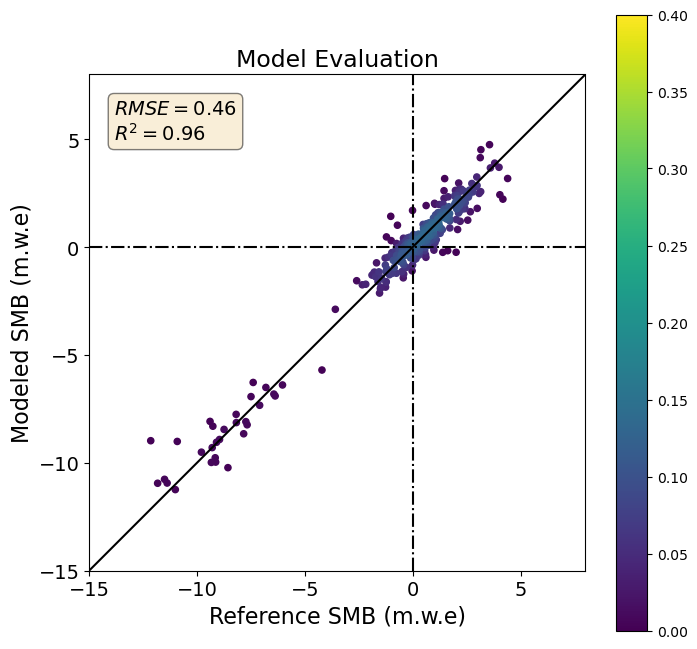

In [186]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), n_toplot=5000)

**Decision tree**

In [187]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [190]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=5, 
                                 min_samples_split=5)

reg_tree.fit(X_train, y_train)

CPU times: user 3.4 ms, sys: 0 ns, total: 3.4 ms
Wall time: 2.87 ms


DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=0)

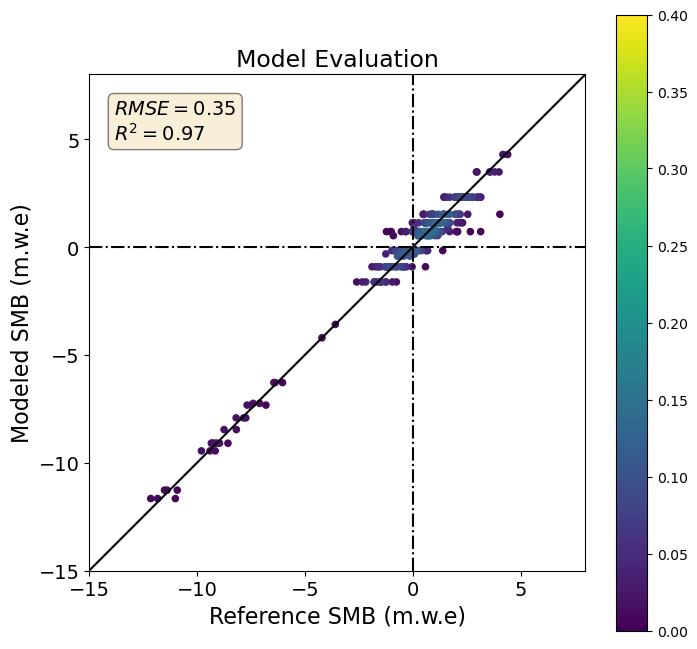

In [191]:
plot_prediction(y_train, reg_tree.predict(X_train), n_toplot=5000)

**Ensemble of trees**

In [192]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [193]:
#model = 'random forest'
model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 50,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 100,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 10,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [194]:
%%time
reg_ensemble.fit(X_train, y_train)

/home/jovyan/envs/oggm_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 246 ms, sys: 0 ns, total: 246 ms
Wall time: 244 ms


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=50, validation_fraction=0.2)

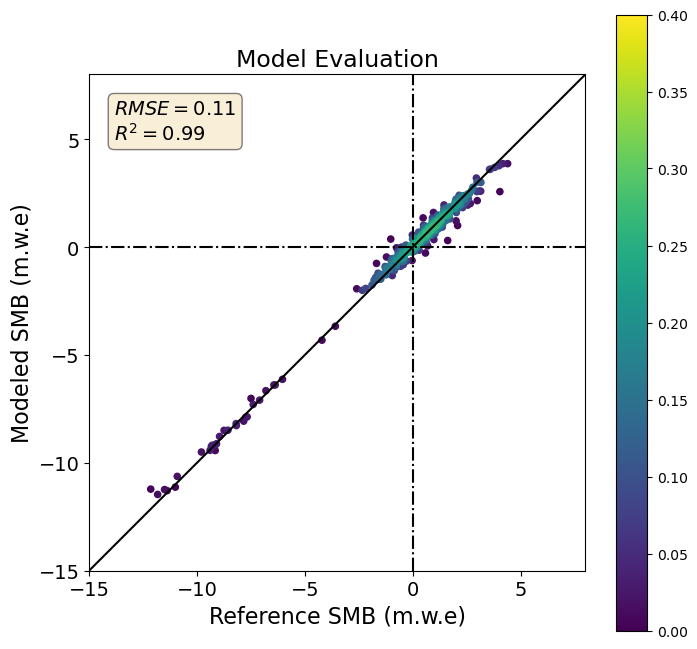

In [195]:
plot_prediction(y_train, reg_ensemble.predict(X_train), n_toplot=5000)

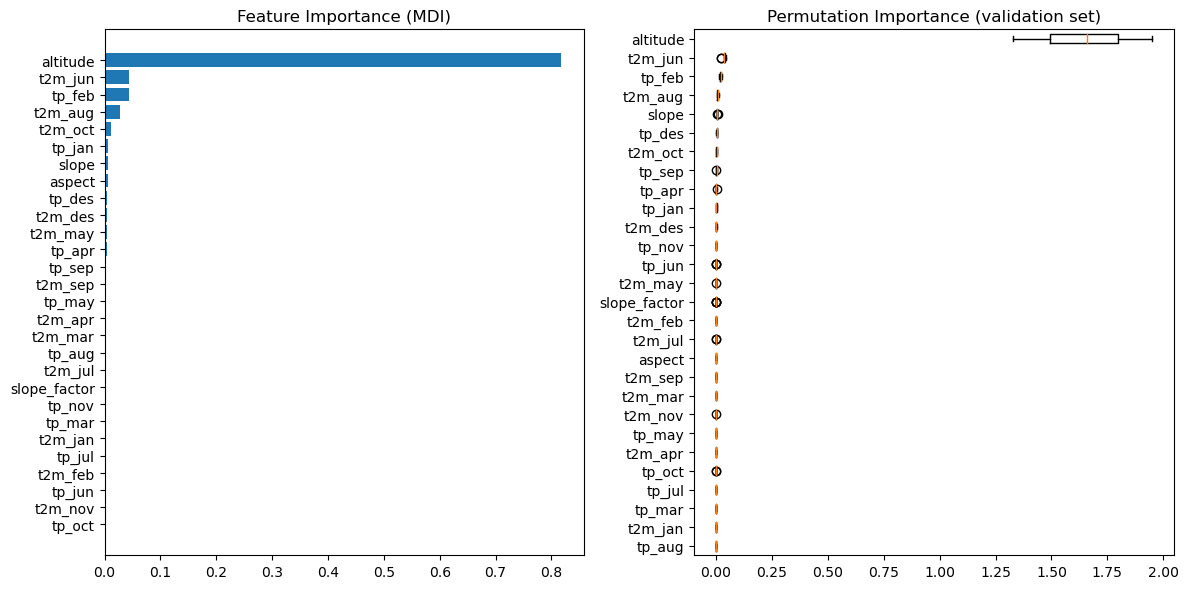

In [196]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_validation_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_validation_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (validation set)")
fig.tight_layout()
plt.show()

**XGBoost**

In [197]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [198]:
xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6, 8],
                               'n_estimators': [50, 100, 200, 300],
                              'learning_rate': [0.01, 0.05, 0.1, 0.2]}, 
                   cv=10,
                   verbose=1,
                   n_jobs=4,
                   scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
-0.48116404240679056
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [199]:
dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'max_depth':4, 'learning_rate':0.1, 'n_estimators': 300}
num_round = 2

In [200]:
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBRegressor(max_depth = 4,
                             n_estimators = 100,
                             learning_rate = 0.1)
#res = xgb.cv(param, dtrain, nfold=10,
#             metrics={'error'})#, #seed=0,
             #callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False),
             #           xgb.callback.EarlyStopping(3)])
        
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

# define model evaluation method
#cv = KFold(n_splits=10, random_state=1)
# evaluate model
#scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
#scores = absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

y_pred = cvp(xgb_model, X_train, y_train, cv=10, n_jobs = 2)#, fit_params = param)

#xgb_model.fit(X_train, y_train)

[-0.40684447 -0.55547958 -0.62835194 -0.59337945 -0.34575916 -0.30603758
 -0.53306934 -0.28642495 -0.5475614  -0.67164857]


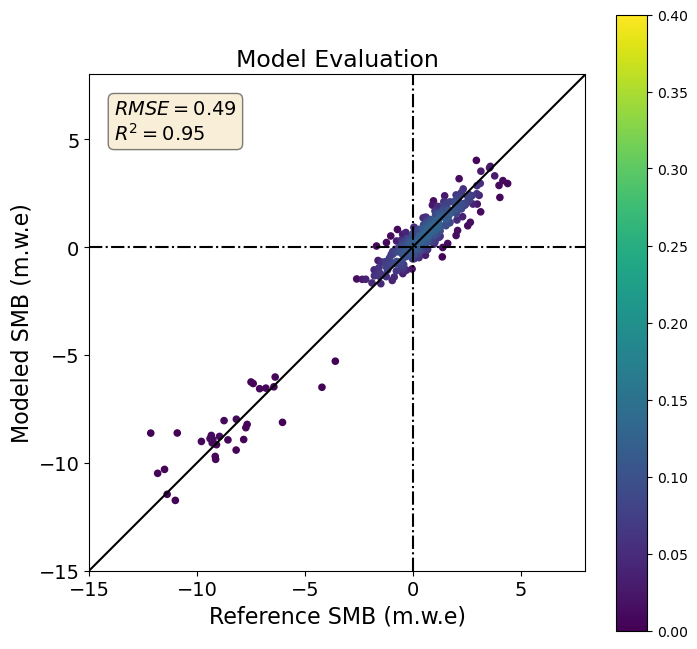

In [201]:
plot_prediction(y_train, y_pred, n_toplot=5000)


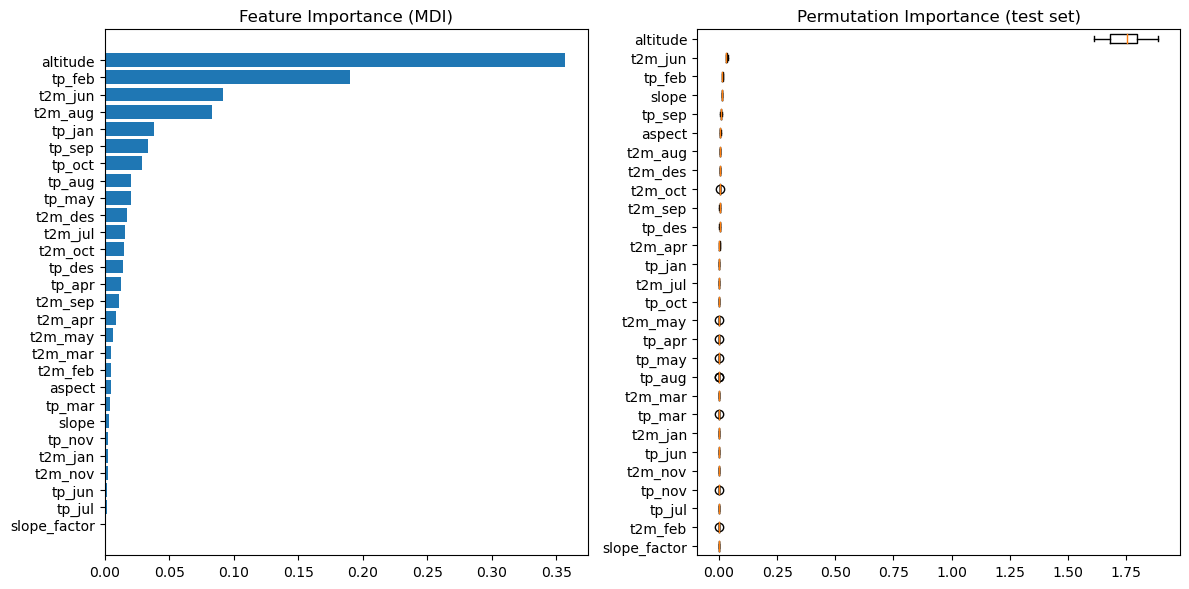

In [202]:
#sorted_idx = xgb_model.feature_importances_.argsort()
#plt.barh(boston.feature_names[sorted_idx], xgb_model.feature_importances_[sorted_idx])
#plt.xlabel("Xgboost Feature Importance")
from sklearn.inspection import permutation_importance


xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()